<a href="https://colab.research.google.com/github/Chpel/Maga/blob/main/OSDA%20.ipynb/Big%20homework/Bin_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from pathlib import Path
import matplotlib.pyplot as plt

# Каталог датасетов

In [ ]:
#local
data_cat = Path.cwd().parent.parent / 'datasets'
if Path.exists(data_cat):
    datasets = list(data_cat.glob('*.csv'))
    print(*list(map(lambda x: x.name, datasets)), sep='\n')

bike_bin.csv
bike_buyers_clean.csv
cancer patient data sets.csv
cancer_bin.csv
car.csv
car_bin.csv


In [3]:
#colab
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d rashmiranu/banking-dataset-classification
!kaggle datasets download -d heeraldedhia/bike-buyers
!kaggle datasets download -d subhajeetdas/car-acceptability-classification-dataset
!mkdir datasets
!unzip banking-dataset-classification -d datasets
!unzip bike-buyers -d datasets
!unzip car-acceptability-classification-dataset -d datasets
data_cat = Path.cwd() / 'datasets'

  0% 0.00/409k [00:00<?, ?B/s]
100% 409k/409k [00:00<00:00, 105MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 37.6MB/s]
  0% 0.00/9.40k [00:00<?, ?B/s]
100% 9.40k/9.40k [00:00<00:00, 22.3MB/s]
mkdir: cannot create directory ‘datasets’: File exists
Archive:  banking-dataset-classification.zip
  inflating: datasets/new_test.csv   
  inflating: datasets/new_train.csv  
Archive:  bike-buyers.zip
  inflating: datasets/bike_buyers.csv  
  inflating: datasets/bike_buyers_clean.csv  
Archive:  car-acceptability-classification-dataset.zip
  inflating: datasets/car.csv        
  inflating: datasets/car.data       


# Датасет 1

In [4]:
df = pd.read_csv(data_cat/"new_train.csv")

In [5]:
for c in df.columns.drop([]):
    print(c,pd.unique(df[c]))

age [49 37 78 36 59 29 26 30 50 33 44 32 43 56 40 47 34 46 39 41 55 38 63 23
 48 53 35 51 71 58 21 45 25 77 28 52 80 57 22 60 27 24 31 42 54 81 64 79
 20 76 82 19 68 65 73 66 85 74 61 86 69 18 83 88 70 87 84 75 62 72 67 89
 17 91 98]
job ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']
marital ['married' 'divorced' 'single' 'unknown']
education ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']
default ['unknown' 'no' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['cellular' 'telephone']
month ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week ['wed' 'mon' 'tue' 'fri' 'thu']
duration [ 227  202 1148 ... 1882 1666 1434]
campaign [ 4  2  1  5  9  3  7  6 13  8 12 10 19 11 31 17 16 29 43 20 14 21 35 15
 33 28 22 25 18 23 27 26 24 34 32 37 30 42 40 56]
pdays [999   3   6  10   

In [7]:
raw_df = df[(df != 'unknown').all(axis=1)].reset_index(drop=True)
raw_df

age           job   marital            education default housing loan  \
0       37  entrepreneur   married    university.degree      no      no   no   
1       78       retired   married             basic.4y      no      no   no   
2       36        admin.   married    university.degree      no     yes   no   
3       59       retired  divorced    university.degree      no      no   no   
4       29        admin.    single    university.degree      no      no   no   
...    ...           ...       ...                  ...     ...     ...  ...   
24300   28      services    single          high.school      no     yes   no   
24301   52    technician   married  professional.course      no     yes   no   
24302   54        admin.   married             basic.9y      no      no  yes   
24303   29        admin.   married    university.degree      no      no   no   
24304   35        admin.   married    university.degree      no      no  yes   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   nov         wed       202         2    999         1   
1       cellular   jul         mon      1148         1    999         0   
2      telephone   may         mon       120         2    999         0   
3       cellular   jun         tue       368         2    999         0   
4       cellular   aug         wed       256         2    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
24300   cellular   jul         tue       192         1    999         0   
24301   cellular   nov         fri        64         1    999         1   
24302   cellular   jul         mon       131         4    999         0   
24303  telephone   may         fri       165         1    999         0   
24304  telephone   jun         tue       544         3    999         0   

          poutcome    y  
0          failure   no  
1      nonexistent  yes  
2      nonexistent   no  
3      nonexistent   no  
4      nonexistent   no  
...            ...  ...  
24300  nonexistent   no  
24301      failure   no  
24302  nonexistent   no  
24303  nonexistent   no  
24304  nonexistent   no  

[24305 rows x 16 columns]

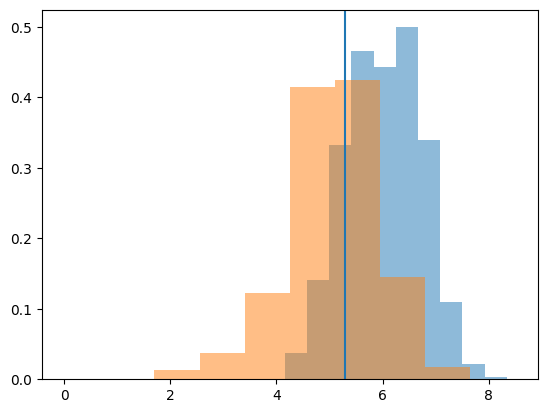

In [28]:
plt.hist(np.log(raw_df[raw_df['y'] == 'yes']['duration']+1), alpha=0.5, density=True)
plt.hist(np.log(raw_df[raw_df['y'] == 'no']['duration']+1), alpha=0.5, density=True)
plt.axvline(5.3)

In [30]:
cols = ['high_educ', 'has_job', 'married', 'default',
        'housing', 'loan', 'cell_cont', 'before_con',
        'current_con', 'long_dur', 'poutcome', 'y']
idx = raw_df.index
res_df = pd.DataFrame(columns=cols, index=idx)
res_df['high_educ'] = ((raw_df['education'] == 'university.degree') | (raw_df['education'] == 'professional.course'))
res_df['has_job'] = ((raw_df['job'] != 'retired') & (raw_df['job'] != 'unemployed') & (raw_df['job'] != 'student'))
res_df['married'] = (raw_df['marital'] == 'married')
res_df['default'] = (raw_df['default'] == 'yes')
res_df['housing'] = (raw_df['housing'] != 'yes')
res_df['loan'] = (raw_df['loan'] != 'yes')
res_df['cell_cont'] = (raw_df['contact'] != 'cellular')
res_df['before_con'] = (raw_df['previous'] > 0)
res_df['current_con'] = (raw_df['campaign'] > 0)
res_df['long_dur'] = (np.log(raw_df['duration']+1) > 5.25)
res_df['poutcome'] = (raw_df['poutcome'] == 'success')
res_df['y'] = (raw_df['y'] == 'no')
res_df

high_educ  has_job  married  default  housing   loan  cell_cont  \
0           True     True     True    False     True   True       True   
1          False    False     True    False     True   True      False   
2           True     True     True    False    False   True       True   
3           True    False    False    False     True   True      False   
4           True     True    False    False     True   True      False   
...          ...      ...      ...      ...      ...    ...        ...   
24300      False     True    False    False    False   True      False   
24301       True     True     True    False    False   True      False   
24302      False     True     True    False     True  False      False   
24303       True     True     True    False     True   True       True   
24304       True     True     True    False     True  False       True   

       before_con  current_con  long_dur  poutcome      y  
0            True         True      True     False   True  
1           False         True      True     False  False  
2           False         True     False     False   True  
3           False         True      True     False   True  
4           False         True      True     False   True  
...           ...          ...       ...       ...    ...  
24300       False         True      True     False   True  
24301        True         True     False     False   True  
24302       False         True     False     False   True  
24303       False         True     False     False   True  
24304       False         True      True     False   True  

[24305 rows x 12 columns]

In [ ]:
res_df.to_csv(data_cat / 'bank_bin.csv')

# Датасет 2

In [ ]:
df = pd.read_csv(data_cat / "bike_buyers_clean.csv")
df

ID Marital Status  Gender  Income  Children        Education  \
0    12496        Married  Female   40000         1        Bachelors   
1    24107        Married    Male   30000         3  Partial College   
2    14177        Married    Male   80000         5  Partial College   
3    24381         Single    Male   70000         0        Bachelors   
4    25597         Single    Male   30000         0        Bachelors   
..     ...            ...     ...     ...       ...              ...   
995  23731        Married    Male   60000         2      High School   
996  28672         Single    Male   70000         4  Graduate Degree   
997  11809        Married    Male   60000         2        Bachelors   
998  19664         Single    Male  100000         3        Bachelors   
999  12121         Single    Male   60000         3      High School   

         Occupation Home Owner  Cars Commute Distance         Region  Age  \
0    Skilled Manual        Yes     0        0-1 Miles         Europe   42   
1          Clerical        Yes     1        0-1 Miles         Europe   43   
2      Professional         No     2        2-5 Miles         Europe   60   
3      Professional        Yes     1       5-10 Miles        Pacific   41   
4          Clerical         No     0        0-1 Miles         Europe   36   
..              ...        ...   ...              ...            ...  ...   
995    Professional        Yes     2        2-5 Miles  North America   54   
996    Professional        Yes     0        2-5 Miles  North America   35   
997  Skilled Manual        Yes     0        0-1 Miles  North America   38   
998      Management         No     3        1-2 Miles  North America   38   
999    Professional        Yes     2        10+ Miles  North America   53   

    Purchased Bike  
0               No  
1               No  
2               No  
3              Yes  
4              Yes  
..             ...  
995            Yes  
996            Yes  
997            Yes  
998             No  
999            Yes  

[1000 rows x 13 columns]

In [ ]:
df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

In [ ]:
for c in df.columns.drop(["ID", "Income", "Age"]):
    print(c, pd.unique(df[c]))

Marital Status ['Married' 'Single']
Gender ['Female' 'Male']
Children [1 3 5 0 2 4]
Education ['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Occupation ['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home Owner ['Yes' 'No']
Cars [0 1 2 4 3]
Commute Distance ['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']
Region ['Europe' 'Pacific' 'North America']
Purchased Bike ['No' 'Yes']


In [ ]:
#raw_df = df[df.columns.drop(["Gender","ID", "Income", "Children", "Age", "Cars", "Marital Status", "Home Owner", "Purchased Bike"])]
raw_df = df[['Commute Distance']]
raw_df

Commute Distance
0          0-1 Miles
1          0-1 Miles
2          2-5 Miles
3         5-10 Miles
4          0-1 Miles
..               ...
995        2-5 Miles
996        2-5 Miles
997        0-1 Miles
998        1-2 Miles
999        10+ Miles

[1000 rows x 1 columns]

In [ ]:
ohe = OneHotEncoder(dtype=int)
ohe.fit(raw_df)
ohe.categories_

[array(['0-1 Miles', '1-2 Miles', '10+ Miles', '2-5 Miles', '5-10 Miles'],
       dtype=object)]

In [ ]:
res_columns = ohe.get_feature_names_out(raw_df.columns)
res_columns

array(['Commute Distance_0-1 Miles', 'Commute Distance_1-2 Miles',
       'Commute Distance_10+ Miles', 'Commute Distance_2-5 Miles',
       'Commute Distance_5-10 Miles'], dtype=object)

In [ ]:
bin_df = ohe.transform(raw_df).toarray()
bin_df = pd.DataFrame(bin_df, columns=res_columns, index=df.index)
bin_df

Commute Distance_0-1 Miles  Commute Distance_1-2 Miles  \
0                             1                           0   
1                             1                           0   
2                             0                           0   
3                             0                           0   
4                             1                           0   
..                          ...                         ...   
995                           0                           0   
996                           0                           0   
997                           1                           0   
998                           0                           1   
999                           0                           0   

     Commute Distance_10+ Miles  Commute Distance_2-5 Miles  \
0                             0                           0   
1                             0                           0   
2                             0                           1   
3                             0                           0   
4                             0                           0   
..                          ...                         ...   
995                           0                           1   
996                           0                           1   
997                           0                           0   
998                           0                           0   
999                           1                           0   

     Commute Distance_5-10 Miles  
0                              0  
1                              0  
2                              0  
3                              1  
4                              0  
..                           ...  
995                            0  
996                            0  
997                            0  
998                            0  
999                            0  

[1000 rows x 5 columns]

C:\Users\Admin\AppData\Local\Temp\ipykernel_15272\3363736554.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  float_df.hist(ax=ax);


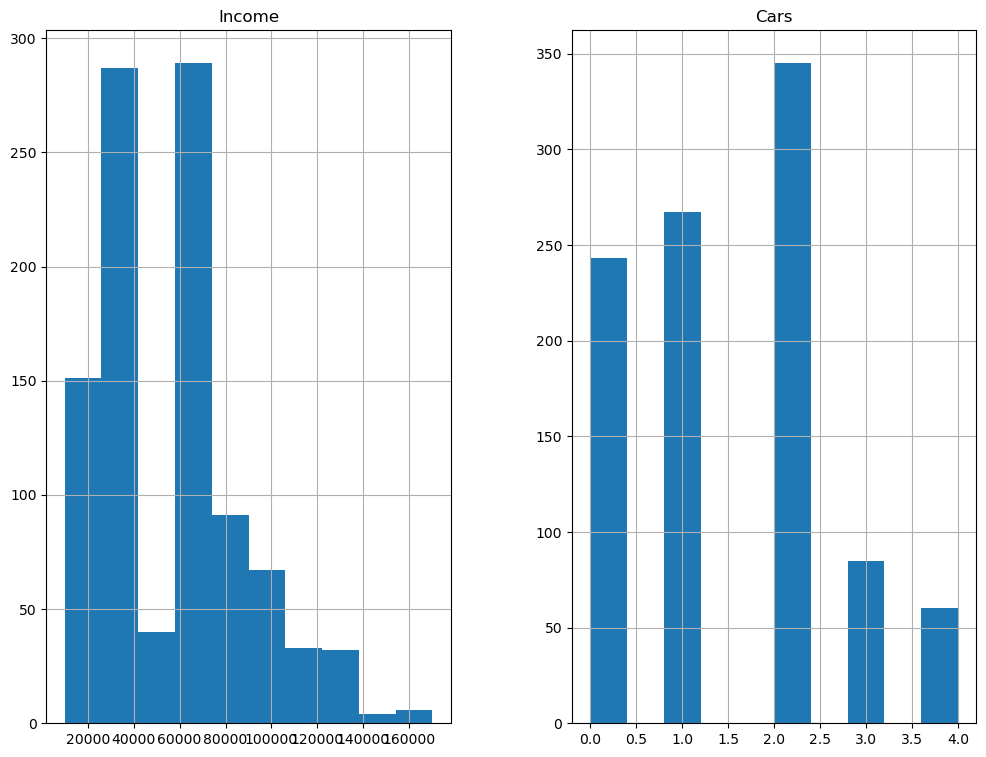

In [ ]:
#float_df = df[["Income", "Age", "Children", "Cars"]]
float_df = df[['Income','Cars']]
fig, ax = plt.subplots(figsize=(12,9), facecolor='white')
float_df.hist(ax=ax);

In [ ]:
float_df.describe()

Income         Cars
count    1000.000000  1000.000000
mean    56140.000000     1.452000
std     31081.609779     1.124705
min     10000.000000     0.000000
25%     30000.000000     1.000000
50%     60000.000000     1.000000
75%     70000.000000     2.000000
max    170000.000000     4.000000

In [ ]:
hister = KBinsDiscretizer(n_bins=[2, 2])
float_res = hister.fit_transform(float_df).toarray()
float_bin = pd.DataFrame(data=float_res, columns=hister.get_feature_names_out(), index=float_df.index, dtype=int)
float_bin

Income_0.0  Income_1.0  Cars_0.0  Cars_1.0
0             1           0         1         0
1             1           0         0         1
2             0           1         0         1
3             0           1         0         1
4             1           0         1         0
..          ...         ...       ...       ...
995           0           1         0         1
996           0           1         1         0
997           0           1         1         0
998           0           1         0         1
999           0           1         0         1

[1000 rows x 4 columns]

In [ ]:
float_map = {name:i for i, name in enumerate(float_df.columns)}
res = []
for i,s in enumerate(float_bin.columns):
    col_name=s.split('_')[0]
    col_num=float_map[col_name]
    bin_num=int(float(s.split('_')[-1]))
    res.append(col_name+'_'+str(int(hister.bin_edges_[col_num][bin_num]))+'-'+str(int(hister.bin_edges_[col_num][bin_num+1])))
float_bin.columns = res
float_bin

Income_10000-60000  Income_60000-170000  Cars_0-1  Cars_1-4
0                     1                    0         1         0
1                     1                    0         0         1
2                     0                    1         0         1
3                     0                    1         0         1
4                     1                    0         1         0
..                  ...                  ...       ...       ...
995                   0                    1         0         1
996                   0                    1         1         0
997                   0                    1         1         0
998                   0                    1         0         1
999                   0                    1         0         1

[1000 rows x 4 columns]

In [ ]:
#prebin_df = df[["Gender","Marital Status", "Home Owner", "Purchased Bike"]]
prebin_df = df[["Gender","Purchased Bike"]]
prebin_df

Gender Purchased Bike
0    Female             No
1      Male             No
2      Male             No
3      Male            Yes
4      Male            Yes
..      ...            ...
995    Male            Yes
996    Male            Yes
997    Male            Yes
998    Male             No
999    Male            Yes

[1000 rows x 2 columns]

In [ ]:
ohe = OneHotEncoder(dtype=int, drop='if_binary')
ohe.fit(prebin_df)
ohe.categories_

[array(['Female', 'Male'], dtype=object), array(['No', 'Yes'], dtype=object)]

In [ ]:
res_columns = ohe.get_feature_names_out(prebin_df.columns)
bin2_df = ohe.transform(prebin_df).toarray()
bin2_df = pd.DataFrame(bin2_df, columns=res_columns, index=df.index)

In [ ]:
res_df = float_bin.merge(right=bin_df, left_index=True, right_index=True)
res_df = res_df.merge(right=bin2_df, left_index=True, right_index=True)
res_df

Income_10000-60000  Income_60000-170000  Cars_0-1  Cars_1-4  \
0                     1                    0         1         0   
1                     1                    0         0         1   
2                     0                    1         0         1   
3                     0                    1         0         1   
4                     1                    0         1         0   
..                  ...                  ...       ...       ...   
995                   0                    1         0         1   
996                   0                    1         1         0   
997                   0                    1         1         0   
998                   0                    1         0         1   
999                   0                    1         0         1   

     Commute Distance_0-1 Miles  Commute Distance_1-2 Miles  \
0                             1                           0   
1                             1                           0   
2                             0                           0   
3                             0                           0   
4                             1                           0   
..                          ...                         ...   
995                           0                           0   
996                           0                           0   
997                           1                           0   
998                           0                           1   
999                           0                           0   

     Commute Distance_10+ Miles  Commute Distance_2-5 Miles  \
0                             0                           0   
1                             0                           0   
2                             0                           1   
3                             0                           0   
4                             0                           0   
..                          ...                         ...   
995                           0                           1   
996                           0                           1   
997                           0                           0   
998                           0                           0   
999                           1                           0   

     Commute Distance_5-10 Miles  Gender_Male  Purchased Bike_Yes  
0                              0            0                   0  
1                              0            1                   0  
2                              0            1                   0  
3                              1            1                   1  
4                              0            1                   1  
..                           ...          ...                 ...  
995                            0            1                   1  
996                            0            1                   1  
997                            0            1                   1  
998                            0            1                   0  
999                            0            1                   1  

[1000 rows x 11 columns]

In [ ]:
res_df.rename({'Home Owner_Yes': 'Home Owner', 'Purchased Bike_Yes': 'Purchased'}, axis=1, inplace=True)
res_df.columns

Index(['Income_10000-60000', 'Income_60000-170000', 'Cars_0-1', 'Cars_1-4',
       'Commute Distance_0-1 Miles', 'Commute Distance_1-2 Miles',
       'Commute Distance_10+ Miles', 'Commute Distance_2-5 Miles',
       'Commute Distance_5-10 Miles', 'Gender_Male', 'Purchased'],
      dtype='object')

In [ ]:
res_df.to_csv(data_cat / 'bike_bin.csv')

# Датасет 3

In [ ]:
df = pd.read_csv(data_cat / "car.csv")

In [ ]:
df.dtypes

Buying_Price         object
Maintenance_Price    object
No_of_Doors          object
Person_Capacity      object
Size_of_Luggage      object
Safety               object
Car_Acceptability    object
dtype: object

In [ ]:
for c in df.columns.drop([]):
    print(c, pd.unique(df[c]))

Buying_Price ['vhigh' 'high' 'med' 'low']
Maintenance_Price ['vhigh' 'high' 'med' 'low']
No_of_Doors ['2' '3' '4' '5more']
Person_Capacity ['2' '4' 'more']
Size_of_Luggage ['small' 'med' 'big']
Safety ['low' 'med' 'high']
Car_Acceptability ['unacc' 'acc' 'vgood' 'good']


In [ ]:
raw_df = df.drop(['Car_Acceptability', 'No_of_Doors', 'Size_of_Luggage'], axis=1)
raw_df = raw_df[((raw_df.Buying_Price != 'vhigh') & (raw_df.Maintenance_Price != 'vhigh'))]
raw_df

Buying_Price Maintenance_Price Person_Capacity Safety
540          high              high               2    low
541          high              high               2    med
542          high              high               2   high
543          high              high               2    low
544          high              high               2    med
...           ...               ...             ...    ...
1723          low               low            more    med
1724          low               low            more   high
1725          low               low            more    low
1726          low               low            more    med
1727          low               low            more   high

[972 rows x 4 columns]

In [ ]:
#raw_df = raw_df.apply(lambda x: x.replace('vhigh', 'high'))

In [ ]:
ohe = OneHotEncoder(dtype=int)
ohe.fit(raw_df)
ohe.categories_

[array(['high', 'low', 'med'], dtype=object),
 array(['high', 'low', 'med'], dtype=object),
 array(['2', '4', 'more'], dtype=object),
 array(['high', 'low', 'med'], dtype=object)]

In [ ]:
res_columns = ohe.get_feature_names_out(raw_df.columns)
res_columns

array(['Buying_Price_high', 'Buying_Price_low', 'Buying_Price_med',
       'Maintenance_Price_high', 'Maintenance_Price_low',
       'Maintenance_Price_med', 'Person_Capacity_2', 'Person_Capacity_4',
       'Person_Capacity_more', 'Safety_high', 'Safety_low', 'Safety_med'],
      dtype=object)

In [ ]:
bin_df = ohe.transform(raw_df).toarray()

In [ ]:
bin_df.dtype

dtype('int32')

In [ ]:
bin_df = pd.DataFrame(bin_df, columns=res_columns, index=raw_df.index)

In [ ]:
y = df['Car_Acceptability'].map({'unacc': 0, 'acc' : 1, 'good' : 1, 'vgood' : 1})

In [ ]:
res_df = bin_df.merge(right=y, left_index=True, right_index=True)
res_df.reset_index(drop=True,inplace=True)
res_df

Buying_Price_high  Buying_Price_low  Buying_Price_med  \
0                    1                 0                 0   
1                    1                 0                 0   
2                    1                 0                 0   
3                    1                 0                 0   
4                    1                 0                 0   
..                 ...               ...               ...   
967                  0                 1                 0   
968                  0                 1                 0   
969                  0                 1                 0   
970                  0                 1                 0   
971                  0                 1                 0   

     Maintenance_Price_high  Maintenance_Price_low  Maintenance_Price_med  \
0                         1                      0                      0   
1                         1                      0                      0   
2                         1                      0                      0   
3                         1                      0                      0   
4                         1                      0                      0   
..                      ...                    ...                    ...   
967                       0                      1                      0   
968                       0                      1                      0   
969                       0                      1                      0   
970                       0                      1                      0   
971                       0                      1                      0   

     Person_Capacity_2  Person_Capacity_4  Person_Capacity_more  Safety_high  \
0                    1                  0                     0            0   
1                    1                  0                     0            0   
2                    1                  0                     0            1   
3                    1                  0                     0            0   
4                    1                  0                     0            0   
..                 ...                ...                   ...          ...   
967                  0                  0                     1            0   
968                  0                  0                     1            1   
969                  0                  0                     1            0   
970                  0                  0                     1            0   
971                  0                  0                     1            1   

     Safety_low  Safety_med  Car_Acceptability  
0             1           0                  0  
1             0           1                  0  
2             0           0                  0  
3             1           0                  0  
4             0           1                  0  
..          ...         ...                ...  
967           0           1                  1  
968           0           0                  1  
969           1           0                  0  
970           0           1                  1  
971           0           0                  1  

[972 rows x 13 columns]

In [ ]:
res_df[res_df['Buying_Price_high'] == 1]

Buying_Price_high  Buying_Price_low  Buying_Price_med  \
0                    1                 0                 0   
1                    1                 0                 0   
2                    1                 0                 0   
3                    1                 0                 0   
4                    1                 0                 0   
..                 ...               ...               ...   
319                  1                 0                 0   
320                  1                 0                 0   
321                  1                 0                 0   
322                  1                 0                 0   
323                  1                 0                 0   

     Maintenance_Price_high  Maintenance_Price_low  Maintenance_Price_med  \
0                         1                      0                      0   
1                         1                      0                      0   
2                         1                      0                      0   
3                         1                      0                      0   
4                         1                      0                      0   
..                      ...                    ...                    ...   
319                       0                      1                      0   
320                       0                      1                      0   
321                       0                      1                      0   
322                       0                      1                      0   
323                       0                      1                      0   

     Person_Capacity_2  Person_Capacity_4  Person_Capacity_more  Safety_high  \
0                    1                  0                     0            0   
1                    1                  0                     0            0   
2                    1                  0                     0            1   
3                    1                  0                     0            0   
4                    1                  0                     0            0   
..                 ...                ...                   ...          ...   
319                  0                  0                     1            0   
320                  0                  0                     1            1   
321                  0                  0                     1            0   
322                  0                  0                     1            0   
323                  0                  0                     1            1   

     Safety_low  Safety_med  Car_Acceptability  
0             1           0                  0  
1             0           1                  0  
2             0           0                  0  
3             1           0                  0  
4             0           1                  0  
..          ...         ...                ...  
319           0           1                  1  
320           0           0                  1  
321           1           0                  0  
322           0           1                  1  
323           0           0                  1  

[324 rows x 13 columns]

In [ ]:
res_df.to_csv(data_cat / 'car_bin.csv')

<Axes: >

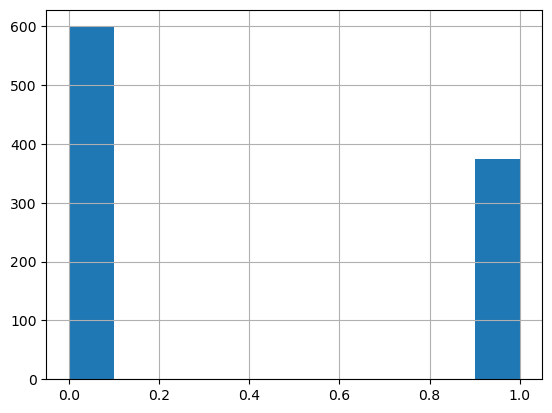

In [ ]:
res_df.Car_Acceptability.hist()